In [21]:
%pip install pm4py
%pip install pandas
%pip install numpy
import pm4py
import pandas as pd
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install pm4py



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install ipywidgets


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
import requests
import pm4py
import tempfile

try:
    # Define the URL of the XES file
    url = "https://raw.githubusercontent.com/HelinYilmaz1/sepsiscase/main/Sepsis%20Cases%20-%20Event%20Log.xes"
    
    # Fetch the file content from the URL
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses

    # Write the content to a temporary file
    with tempfile.NamedTemporaryFile(delete=False, suffix='.xes') as tmp_file:
        tmp_file.write(response.content)
        temp_file_path = tmp_file.name

    # Read the XES file using pm4py
    log_df = pm4py.read_xes(temp_file_path)

    # Optional: Inspect the first few events to understand the structure
    for case_index, case in enumerate(log_df):
        if case_index >= 3:  # Only print the first 3 cases to avoid too much output
            break
        print(f"Case {case_index + 1}:")
        for event in case:
            print(event)
        print()

except requests.exceptions.HTTPError as http_err:
    print(f'HTTP error occurred: {http_err}')  # Print HTTP error
except Exception as err:
    print(f'Other error occurred: {err}')  # Print any other error


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

Case 1:
I
n
f
e
c
t
i
o
n
S
u
s
p
e
c
t
e
d

Case 2:
o
r
g
:
g
r
o
u
p

Case 3:
D
i
a
g
n
o
s
t
i
c
B
l
o
o
d



In [25]:
num_events = len(log_df)
num_cases = len(log_df['case:concept:name'].unique())
print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

Number of events: 15214
Number of cases: 1050


In [26]:
start_activities = pm4py.get_start_activities(log_df)
end_activities = pm4py.get_end_activities(log_df)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'ER Registration': 995, 'IV Liquid': 14, 'ER Triage': 6, 'CRP': 10, 'ER Sepsis Triage': 7, 'Leucocytes': 18}
End activities: {'Release A': 393, 'Return ER': 291, 'IV Antibiotics': 87, 'Release B': 55, 'ER Sepsis Triage': 49, 'Leucocytes': 44, 'IV Liquid': 12, 'Release C': 19, 'CRP': 41, 'LacticAcid': 24, 'Release D': 14, 'Admission NC': 14, 'Release E': 5, 'ER Triage': 2}


In [32]:
# Incomplete cases

## Let's consider incomplete all cases not ending with a legal end activity like Payment or Send for Credit Collection

filtered_log = pm4py.filter_end_activities(log_df, ['Release A', 'Release B', 'Release C', 'Release D', 'Release E', 'Return ER'])
filtered_log = pm4py.filter_start_activities(filtered_log, ['ER Registration', 'ER Sepsis Triage', 'ER Triage'])
                                           
print("Given {} total cases in the log we have {} cases that comply with the applied filter".format(len(log_df['case:concept:name'].unique()), len(filtered_log['case:concept:name'].unique())))


Given 1050 total cases in the log we have 743 cases that comply with the applied filter


In [33]:
pip install pm4py pandas seaborn matplotlib



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


{('Admission IC', 'Admission IC'): 1, ('Admission IC', 'Admission NC'): 4, ('Admission IC', 'CRP'): 32, ('Admission IC', 'ER Sepsis Triage'): 1, ('Admission IC', 'LacticAcid'): 36, ('Admission IC', 'Leucocytes'): 30, ('Admission NC', 'Admission IC'): 18, ('Admission NC', 'Admission NC'): 168, ('Admission NC', 'CRP'): 346, ('Admission NC', 'ER Sepsis Triage'): 5, ('Admission NC', 'ER Triage'): 1, ('Admission NC', 'IV Antibiotics'): 2, ('Admission NC', 'IV Liquid'): 18, ('Admission NC', 'LacticAcid'): 27, ('Admission NC', 'Leucocytes'): 381, ('Admission NC', 'Release A'): 113, ('Admission NC', 'Release B'): 15, ('Admission NC', 'Release C'): 4, ('Admission NC', 'Release D'): 1, ('CRP', 'Admission IC'): 15, ('CRP', 'Admission NC'): 177, ('CRP', 'CRP'): 291, ('CRP', 'ER Sepsis Triage'): 24, ('CRP', 'ER Triage'): 7, ('CRP', 'IV Antibiotics'): 61, ('CRP', 'IV Liquid'): 90, ('CRP', 'LacticAcid'): 525, ('CRP', 'Leucocytes'): 1256, ('CRP', 'Release A'): 309, ('CRP', 'Release B'): 18, ('CRP', 'R

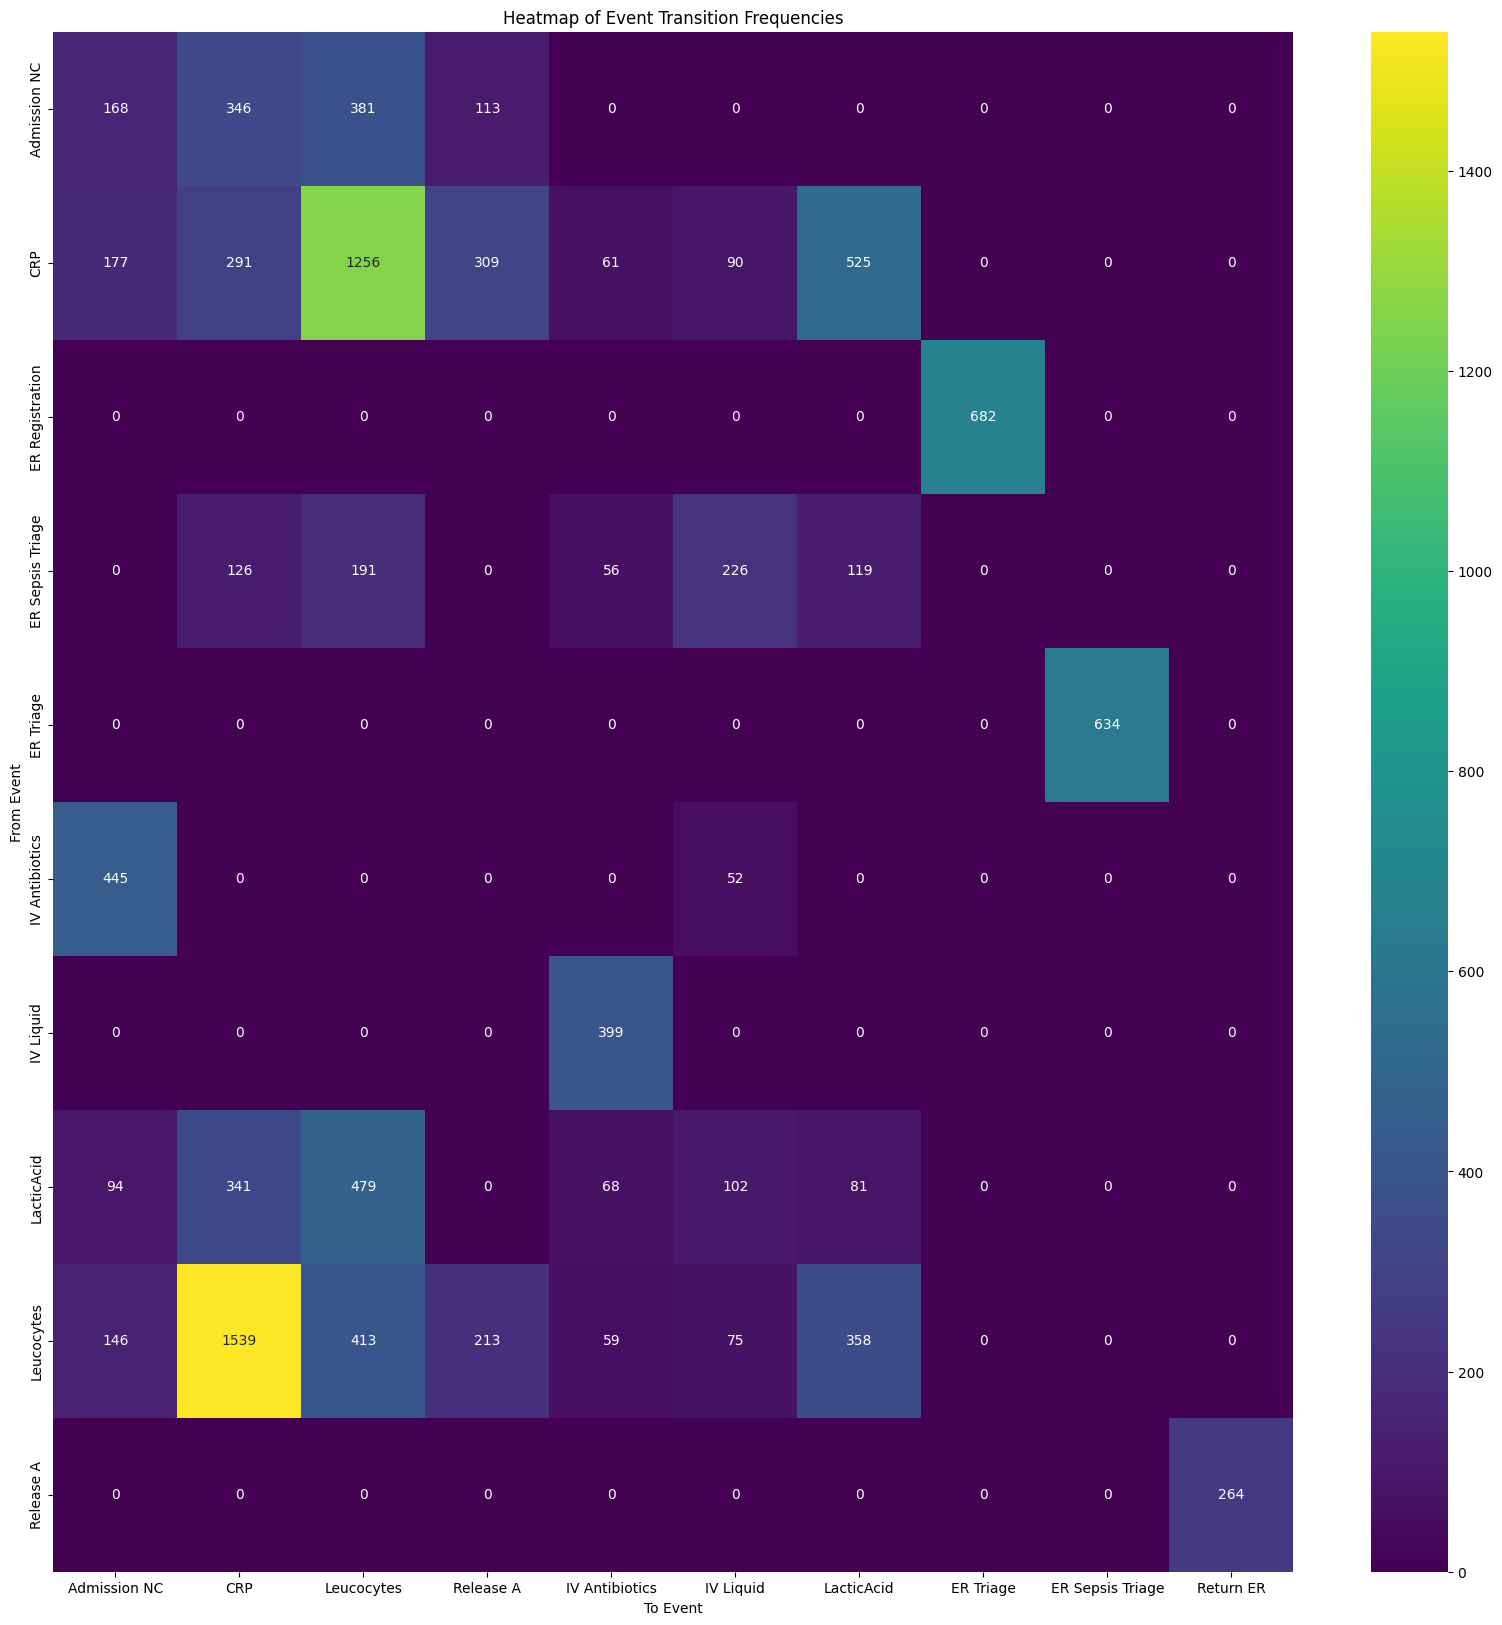

In [34]:
import pm4py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `filtered_log` is already defined and loaded
dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_log)
print(dfg)

threshold = 50

# Filter the DFG to only include transitions with frequency greater than the threshold
filtered_dfg = {key: value for key, value in dfg.items() if value > threshold}

# Initialize the transition matrix
transition_matrix = {}
for (from_event, to_event), frequency in filtered_dfg.items():
    if from_event not in transition_matrix:
        transition_matrix[from_event] = {}
    transition_matrix[from_event][to_event] = frequency

# Convert the transition matrix to a DataFrame
df_matrix = pd.DataFrame(transition_matrix).fillna(0).astype(int).T

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df_matrix, annot=True, fmt="d", cmap="viridis")
plt.title('Heatmap of Event Transition Frequencies')
plt.xlabel('To Event')
plt.ylabel('From Event')
plt.show()


In [36]:
start_activities = pm4py.get_start_activities(filtered_log)
end_activities = pm4py.get_end_activities(filtered_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'ER Registration': 734, 'ER Triage': 4, 'ER Sepsis Triage': 5}
End activities: {'Release A': 377, 'Return ER': 282, 'Release B': 50, 'Release C': 16, 'Release D': 13, 'Release E': 5}


In [37]:
start_activities = pm4py.get_start_activities(segmentLactRisk)
end_activities = pm4py.get_end_activities(segmentLactRisk)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'ER Registration': 263, 'ER Triage': 2, 'ER Sepsis Triage': 3}
End activities: {'Release A': 125, 'Release B': 25, 'Return ER': 109, 'Release D': 5, 'Release C': 3, 'Release E': 1}


In [38]:
var1 = len(segmentLactRisk['case:concept:name'].unique()) / len(filtered_log['case:concept:name'].unique())
var2 = 282/ len(filtered_log['case:concept:name'].unique())

liftvalue = (109/len(segmentLactRisk['case:concept:name'].unique()))/(var1*var2)    

print(liftvalue)         

2.9708821820557425


In [39]:
%pip install pm4py
%pip install pandas
%pip install matplotlib



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

Start activities: ['ER Registration', 'IV Liquid', 'ER Triage', 'CRP', 'ER Sepsis Triage', 'Leucocytes']
End activities: ['Release A', 'Return ER', 'IV Antibiotics', 'Release B', 'ER Sepsis Triage', 'Leucocytes', 'IV Liquid', 'Release C', 'CRP', 'LacticAcid', 'Release D', 'Admission NC', 'Release E', 'ER Triage']


<Figure size 1200x1000 with 0 Axes>

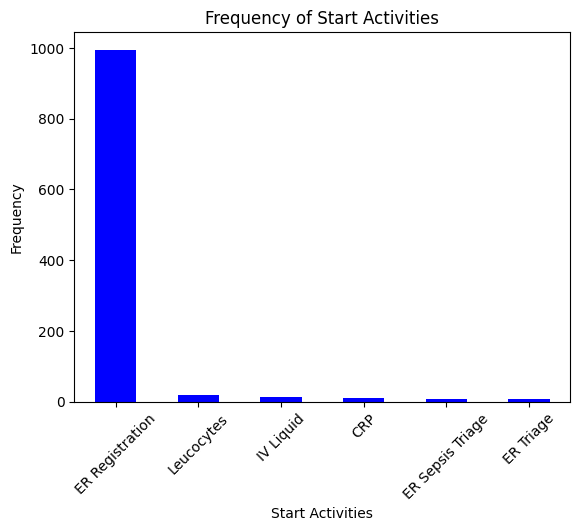

<Figure size 1200x1200 with 0 Axes>

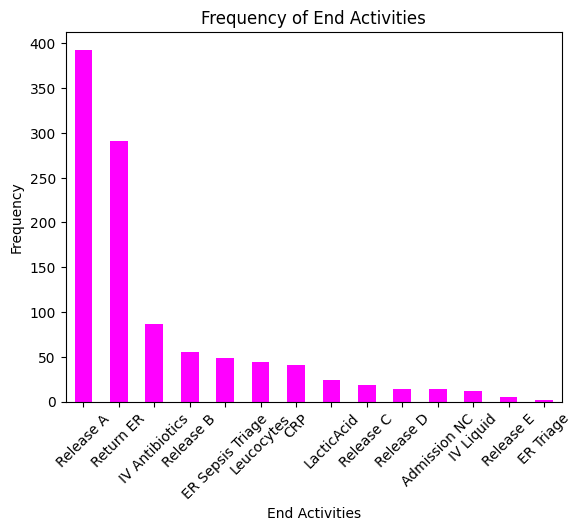

Exception: please provide the variant between: next_activity, next_time, remaining_time

In [40]:
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import requests
import tempfile

# URL of the XES file
url = 'https://raw.githubusercontent.com/HelinYilmaz1/sepsiscase/main/Sepsis%20Cases%20-%20Event%20Log.xes'

# Download the file from the URL and save it in a temporary file
response = requests.get(url)
temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.xes')
temp_file.write(response.content)
temp_file.close()

# Load the event log from the downloaded XES file
event_log = pm4py.read_xes(temp_file.name)

# Extract start and end activities
start_activities_dict = pm4py.get_start_activities(event_log)
end_activities_dict = pm4py.get_end_activities(event_log)

# Convert start and end activities to lists of activity names
start_activities = list(start_activities_dict.keys())
end_activities = list(end_activities_dict.keys())

print(f"Start activities: {start_activities}")
print(f"End activities: {end_activities}")

# Convert start and end activities to DataFrames for plotting
start_activities_df = pd.DataFrame(list(start_activities_dict.items()), columns=['Activity', 'Frequency'])
end_activities_df = pd.DataFrame(list(end_activities_dict.items()), columns=['Activity', 'Frequency'])

# Plot start activities
plt.figure(figsize=(12, 10))
start_activities_df.sort_values(by='Frequency', ascending=False).plot(kind='bar', x='Activity', y='Frequency', color='blue', legend=False)
plt.title('Frequency of Start Activities')
plt.ylabel('Frequency')
plt.xlabel('Start Activities')
plt.xticks(rotation=45)
plt.show()

# Plot end activities
plt.figure(figsize=(12, 12))
end_activities_df.sort_values(by='Frequency', ascending=False).plot(kind='bar', x='Activity', y='Frequency', color='magenta', legend=False)
plt.title('Frequency of End Activities')
plt.ylabel('Frequency')
plt.xlabel('End Activities')
plt.xticks(rotation=45)
plt.show()

# Example of filtered log (assuming the filtered log is the same as the event log for simplicity)
filtered_log = event_log  # Replace with your actual filtered log

# Extract features dataframe
features_df = pm4py.extract_features_dataframe(
    filtered_log, 
    activity_key='concept:name', 
    timestamp_key='time:timestamp', 
    case_id_key='case:concept:name', 
    start_activities=start_activities,  # List of start activities
    end_activities=end_activities       # List of end activities
)

# Extract target vector for next activity prediction
vector_next_act, class_next_act = pm4py.extract_target_vector(filtered_log, 'concept:name')

print(vector_next_act)
print(class_next_act)




In [46]:
# Defining start and end activities
start_activities_list = ['ER Registration', 'ER Sepsis Triage', 'ER Triage']
end_activities_list = ['Release A', 'Release B', 'Release C', 'Release D', 'Release E', 'Return ER']

# Filtering cases by start activities
log_with_start_activities = pm4py.filter_start_activities(log_df, start_activities_list)

# Filtering cases that do not end with specified activities
log_without_end_activities = pm4py.filter_end_activities(log_with_start_activities, end_activities_list, retain=False)

cleaned_log = pm4py.filter_end_activities(log_with_start_activities, end_activities_list, retain=True)

cleaned_df = pm4py.convert_to_dataframe(cleaned_log)

def compute_case_duration(df):
    # Creating columns for the end and start date of each case
    df['End Date'] = df.groupby('case:concept:name')['time:timestamp'].transform('max')
    df['Start Date'] = df.groupby('case:concept:name')['time:timestamp'].transform('min')
    # Calculating the duration for each case
    df['Duration'] = df['End Date'] - df['Start Date']

    # Group by case id and get the duration
    case_durations = df.groupby('case:concept:name')['Duration'].first()
    return case_durations

# Compute the durations for the cleaned dataset
case_durations = compute_case_duration(cleaned_df)

# Calculate mean, median, mode, and standard deviation of the case durations
mean_duration = case_durations.mean()
median_duration = case_durations.median()
std_duration = case_durations.std()

print("Mean Duration:", mean_duration)
print("Median Duration:", median_duration)
print("Standard Deviation of Duration:", std_duration)

Mean Duration: 38 days 15:10:50.425302826
Median Duration: 9 days 06:41:11
Standard Deviation of Duration: 67 days 19:26:58.950116386


/var/folders/_m/f0p_ms5n47x_n4d21g19nlh00000gn/T/ipykernel_64169/2181897114.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End Date'] = df.groupby('case:concept:name')['time:timestamp'].transform('max')
/var/folders/_m/f0p_ms5n47x_n4d21g19nlh00000gn/T/ipykernel_64169/2181897114.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Date'] = df.groupby('case:concept:name')['time:timestamp'].transform('min')
/var/folders/_m/f0p_ms5n47x_n4d21g19nlh00000gn/T/ipykernel_64169/2181897114.py:23: S

In [47]:
# Outliers - cases with duration greater than mean + 3 * std deviation
outliers = case_durations[case_durations > mean_duration + 3 * std_duration]

# Print the number of outliers
num_outliers = len(outliers)
print(f"Number of outliers: {num_outliers}")

Number of outliers: 21


In [3]:
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tempfile

# URL of the XES file
url = 'https://raw.githubusercontent.com/HelinYilmaz1/sepsiscase/main/Sepsis%20Cases%20-%20Event%20Log.xes'

# Download the file from the URL and save it in a temporary file
response = requests.get(url)
temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.xes')
temp_file.write(response.content)
temp_file.close()

# Load the event log from the downloaded XES file
log_df = pm4py.read_xes(temp_file.name)

# Get the start and end activities
start_activities = pm4py.get_start_activities(log_df)
end_activities = pm4py.get_end_activities(log_df)

print("Start Activities:")
print(start_activities)
print("\nEnd Activities:")
print(end_activities)


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

Start Activities:
{'ER Registration': 995, 'IV Liquid': 14, 'ER Triage': 6, 'CRP': 10, 'ER Sepsis Triage': 7, 'Leucocytes': 18}

End Activities:
{'Release A': 393, 'Return ER': 291, 'IV Antibiotics': 87, 'Release B': 55, 'ER Sepsis Triage': 49, 'Leucocytes': 44, 'IV Liquid': 12, 'Release C': 19, 'CRP': 41, 'LacticAcid': 24, 'Release D': 14, 'Admission NC': 14, 'Release E': 5, 'ER Triage': 2}


In [5]:
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tempfile

# URL of the XES file
url = 'https://raw.githubusercontent.com/HelinYilmaz1/sepsiscase/main/Sepsis%20Cases%20-%20Event%20Log.xes'

# Download the file from the URL and save it in a temporary file
response = requests.get(url)
temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.xes')
temp_file.write(response.content)
temp_file.close()

# Load the event log from the downloaded XES file
log_df = pm4py.read_xes(temp_file.name)

# Convert the event log to a DataFrame for inspection
log_df = pm4py.convert_to_dataframe(log_df)

# Inspect the unique start and end activities
start_activities = log_df.groupby('case:concept:name').first()['concept:name'].value_counts()
end_activities = log_df.groupby('case:concept:name').last()['concept:name'].value_counts()

print("Start Activities:")
print(start_activities)
print("\nEnd Activities:")
print(end_activities)


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

Start Activities:
concept:name
ER Registration     995
Leucocytes           18
IV Liquid            14
CRP                  10
ER Sepsis Triage      7
ER Triage             6
Name: count, dtype: int64

End Activities:
concept:name
Release A           393
Return ER           291
IV Antibiotics       87
Release B            55
ER Sepsis Triage     49
Leucocytes           44
CRP                  41
LacticAcid           24
Release C            19
Admission NC         14
Release D            14
IV Liquid            12
Release E             5
ER Triage             2
Name: count, dtype: int64


Given 1050 total cases in the log we have 1050 cases that comply with the applied filter
Number of complete cases: 1050


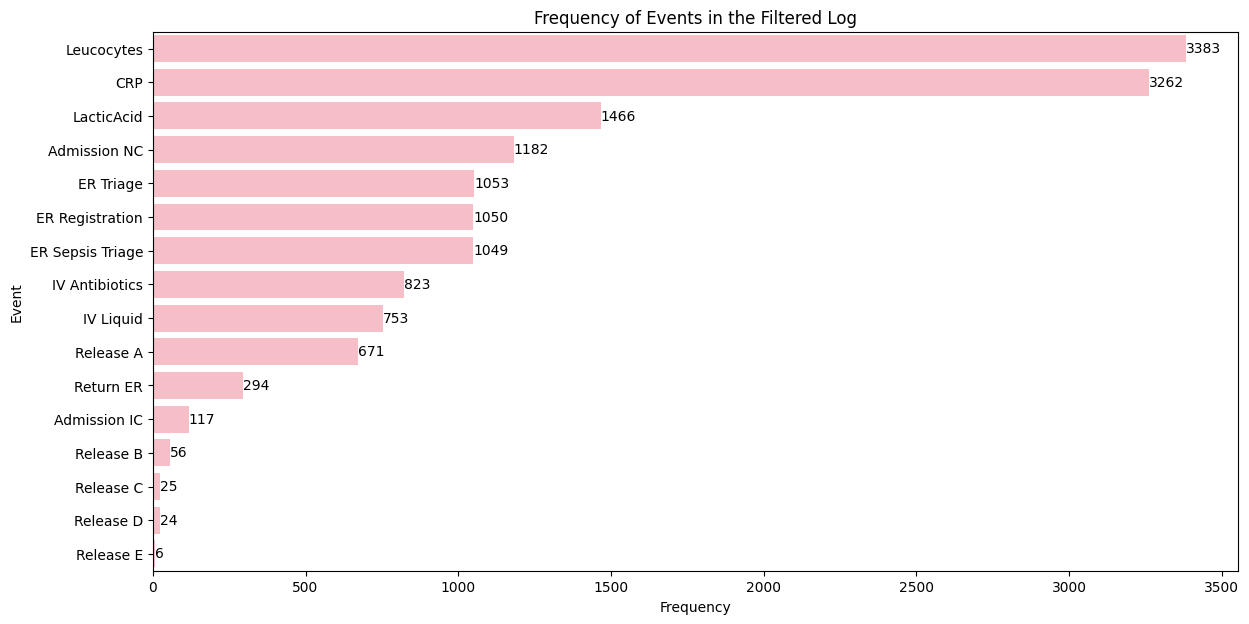

In [6]:
# Define the legal end activities based on inspection
legal_end_activities = end_activities.index.tolist()  # Adjust based on inspection

# Filter out incomplete cases (those that do not end with a legal end activity)
filtered_log = pm4py.filter_end_activities(log_df, legal_end_activities, retain=True)

# Define the valid start activities based on inspection
start_activities = start_activities.index.tolist()  # Adjust based on inspection

# Further filter the log to keep only cases that start with valid start activities
filtered_log = pm4py.filter_start_activities(filtered_log, start_activities)

# Print the number of cases that comply with the applied filters
print("Given {} total cases in the log we have {} cases that comply with the applied filter".format(len(log_df['case:concept:name'].unique()), len(filtered_log['case:concept:name'].unique())))

# Converting the filtered event log back to a DataFrame
filtered_df = pm4py.convert_to_dataframe(filtered_log)

# Get the number of complete cases
num_complete_cases = filtered_df['case:concept:name'].nunique()
print("Number of complete cases:", num_complete_cases)

# Calculate the frequency of each event in the filtered log
event_frequencies = filtered_df['concept:name'].value_counts()

# Convert event frequencies to DataFrame
event_frequencies_df = event_frequencies.reset_index()
event_frequencies_df.columns = ['Event', 'Frequency']

# Plot the most common events
plt.figure(figsize=(14, 7))
sns.barplot(x='Frequency', y='Event', data=event_frequencies_df.sort_values(by='Frequency', ascending=False), color='lightpink')
plt.title('Frequency of Events in the Filtered Log')
plt.xlabel('Frequency')
plt.ylabel('Event')

for index, value in enumerate(event_frequencies_df.sort_values(by='Frequency', ascending=False)['Frequency']):
    plt.text(value, index, str(value), va='center')

plt.show()


In [8]:
import numpy as np
print('Filtered log: ', len(filtered_log))

min_val = 50
max_val = filtered_log['CRP'].max()

step_size = 1

array = np.arange(min_val, max_val + 1, step_size)

segmentCRP50a = pm4py.filter_trace_attribute_values(filtered_log, 'CRP', array, case_id_key='case:concept:name')
print('CRP more than 50: ', len(segmentCRP50a))

condition = (filtered_log['Leucocytes'] < 4) | (filtered_log['Leucocytes'] >= 12)
CasesLeuRisk = filtered_log[condition]['case:concept:name'].unique()
segmentLeuRisk = filtered_log[filtered_log['case:concept:name'].isin(CasesLeuRisk)]
print('Leucocytes:', len(segmentLeuRisk))

# Define the condition for Lactic Acid
CasesLactRisk = filtered_log[filtered_log['LacticAcid'] >= 2]['case:concept:name'].unique()
segmentLactRisk = filtered_log[filtered_log['case:concept:name'].isin(CasesLactRisk)]
print('LacticAcid more than 2.0:', len(segmentLactRisk))

Filtered log:  15214
CRP more than 50:  12997
Leucocytes: 11127
LacticAcid more than 2.0: 6295


In [41]:
import pandas as pd
import pm4py
import requests
import tempfile
import numpy as np

# URL of the XES file
url = 'https://raw.githubusercontent.com/HelinYilmaz1/sepsiscase/main/Sepsis%20Cases%20-%20Event%20Log.xes'

# Download the file from the URL and save it in a temporary file
response = requests.get(url)
temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.xes')
temp_file.write(response.content)
temp_file.close()

# Load the event log from the downloaded XES file
log = pm4py.read_xes(temp_file.name)

# Convert the event log to a DataFrame for inspection
log_df = pm4py.convert_to_dataframe(log)

# Ensure the numerical columns are of numeric type
log_df['Leucocytes'] = pd.to_numeric(log_df['Leucocytes'], errors='coerce')
log_df['LacticAcid'] = pd.to_numeric(log_df['LacticAcid'], errors='coerce')
log_df['CRP'] = pd.to_numeric(log_df['CRP'], errors='coerce')

# 1. WBC counts of less than 4,000/μl or more than 12,000/μl
wbc_condition = (log_df['Leucocytes'] < 4000) | (log_df['Leucocytes'] > 12000)
wbc_cases = log_df[wbc_condition]['case:concept:name'].unique()
segment_wbc = log_df[log_df['case:concept:name'].isin(wbc_cases)]
print('WBC counts less than 4000/μl or more than 12000/μl:', len(segment_wbc['case:concept:name'].unique()))

# 2. LacticAcid levels > 2.0 µg/L
lactic_acid_high_condition = log_df['LacticAcid'] > 2.0
lactic_acid_high_cases = log_df[lactic_acid_high_condition]['case:concept:name'].unique()
segment_lactic_acid_high = log_df[log_df['case:concept:name'].isin(lactic_acid_high_cases)]
print('LacticAcid more than 2.0 µg/L:', len(segment_lactic_acid_high['case:concept:name'].unique()))

# 3. CRP of 50 mg/l or more
crp_condition = log_df['CRP'] >= 50
crp_cases = log_df[crp_condition]['case:concept:name'].unique()
segment_crp = log_df[log_df['case:concept:name'].isin(crp_cases)]
print('CRP more than 50 mg/L:', len(segment_crp['case:concept:name'].unique()))

# CRP of 100 mg/l or more on the 3rd day
third_day_crp_condition = (log_df['CRP'] >= 100) & (log_df['time:timestamp'].dt.day == 3)
third_day_crp_cases = log_df[third_day_crp_condition]['case:concept:name'].unique()
segment_third_day_crp = log_df[log_df['case:concept:name'].isin(third_day_crp_cases)]
print('3rd day CRP more than 100 mg/L:', len(segment_third_day_crp['case:concept:name'].unique()))


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

WBC counts less than 4000/μl or more than 12000/μl: 1011
LacticAcid more than 2.0 µg/L: 312
CRP more than 50 mg/L: 787
3rd day CRP more than 100 mg/L: 45


In [11]:
import pandas as pd
import pm4py
import requests
import tempfile

# URL of the XES file
url = 'https://raw.githubusercontent.com/HelinYilmaz1/sepsiscase/main/Sepsis%20Cases%20-%20Event%20Log.xes'

# Download the file from the URL and save it in a temporary file
response = requests.get(url)
temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.xes')
temp_file.write(response.content)
temp_file.close()

# Load the event log from the downloaded XES file
log = pm4py.read_xes(temp_file.name)

# Convert the event log to a DataFrame for inspection
log_df = pm4py.convert_to_dataframe(log)

# Ensure the numerical columns are of numeric type
log_df['Leucocytes'] = pd.to_numeric(log_df['Leucocytes'], errors='coerce')
log_df['LacticAcid'] = pd.to_numeric(log_df['LacticAcid'], errors='coerce')
log_df['CRP'] = pd.to_numeric(log_df['CRP'], errors='coerce')

def get_start_end_activities(segment_log_df):
    # Convert the DataFrame back to an event log
    segment_log = pm4py.convert_to_event_log(segment_log_df)
    
    # Get start and end activities
    start_activities = pm4py.get_start_activities(segment_log)
    end_activities = pm4py.get_end_activities(segment_log)
    
    return start_activities, end_activities

# 1. WBC counts of less than 4,000/μl or more than 12,000/μl
wbc_condition = (log_df['Leucocytes'] < 4) | (log_df['Leucocytes'] > 12)
wbc_cases = log_df[wbc_condition]['case:concept:name'].unique()
segment_wbc = log_df[log_df['case:concept:name'].isin(wbc_cases)]
print('WBC counts < 4000/μl or > 12000/μl:', len(segment_wbc['case:concept:name'].unique()))
start_wbc, end_wbc = get_start_end_activities(segment_wbc)
print("Start activities for WBC segment:", start_wbc)
print("End activities for WBC segment:", end_wbc)

# 2. LacticAcid levels > 2.0 µg/L
lactic_acid_high_condition = log_df['LacticAcid'] > 2.0
lactic_acid_high_cases = log_df[lactic_acid_high_condition]['case:concept:name'].unique()
segment_lactic_acid_high = log_df[log_df['case:concept:name'].isin(lactic_acid_high_cases)]
print('LacticAcid > 2.0 µg/L:', len(segment_lactic_acid_high['case:concept:name'].unique()))
start_lactic_acid_high, end_lactic_acid_high = get_start_end_activities(segment_lactic_acid_high)
print("Start activities for high Lactic Acid segment:", start_lactic_acid_high)
print("End activities for high Lactic Acid segment:", end_lactic_acid_high)

# 3. CRP of 50 mg/l or more
crp_condition = log_df['CRP'] >= 50
crp_cases = log_df[crp_condition]['case:concept:name'].unique()
segment_crp = log_df[log_df['case:concept:name'].isin(crp_cases)]
print('CRP >= 50 mg/L:', len(segment_crp['case:concept:name'].unique()))
start_crp, end_crp = get_start_end_activities(segment_crp)
print("Start activities for CRP segment:", start_crp)
print("End activities for CRP segment:", end_crp)

# CRP of 100 mg/l or more on the 3rd day
third_day_crp_condition = (log_df['CRP'] >= 100) & (log_df['time:timestamp'].dt.day == 3)
third_day_crp_cases = log_df[third_day_crp_condition]['case:concept:name'].unique()
segment_third_day_crp = log_df[log_df['case:concept:name'].isin(third_day_crp_cases)]
print('3rd day CRP >= 100 mg/L:', len(segment_third_day_crp['case:concept:name'].unique()))
start_third_day_crp, end_third_day_crp = get_start_end_activities(segment_third_day_crp)
print("Start activities for 3rd day CRP segment:", start_third_day_crp)
print("End activities for 3rd day CRP segment:", end_third_day_crp)


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

WBC counts < 4000/μl or > 12000/μl: 658
Start activities for WBC segment: {'ER Registration': 616, 'IV Liquid': 11, 'ER Triage': 5, 'CRP': 7, 'ER Sepsis Triage': 4, 'Leucocytes': 15}
End activities for WBC segment: {'Release A': 256, 'Return ER': 209, 'Release B': 40, 'IV Liquid': 10, 'Leucocytes': 18, 'Release C': 14, 'IV Antibiotics': 55, 'LacticAcid': 13, 'Release D': 12, 'CRP': 17, 'Admission NC': 7, 'Release E': 4, 'ER Sepsis Triage': 3}
LacticAcid > 2.0 µg/L: 312
Start activities for high Lactic Acid segment: {'ER Registration': 295, 'ER Triage': 4, 'ER Sepsis Triage': 4, 'IV Liquid': 6, 'CRP': 2, 'Leucocytes': 1}
End activities for high Lactic Acid segment: {'Release A': 115, 'IV Antibiotics': 28, 'Release B': 27, 'Return ER': 104, 'Leucocytes': 8, 'LacticAcid': 10, 'Admission NC': 4, 'Release D': 4, 'ER Triage': 1, 'Release C': 3, 'CRP': 3, 'IV Liquid': 4, 'Release E': 1}
LacticAcid < 0.5 µg/L: 15
Start activities for low Lactic Acid segment: {'ER Registration': 12, 'Leucocytes

/var/folders/_m/f0p_ms5n47x_n4d21g19nlh00000gn/T/ipykernel_65372/1481471473.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(data=activity_df, x='Segment', y='Count', hue='Activity', palette=custom_palette, ci=None)


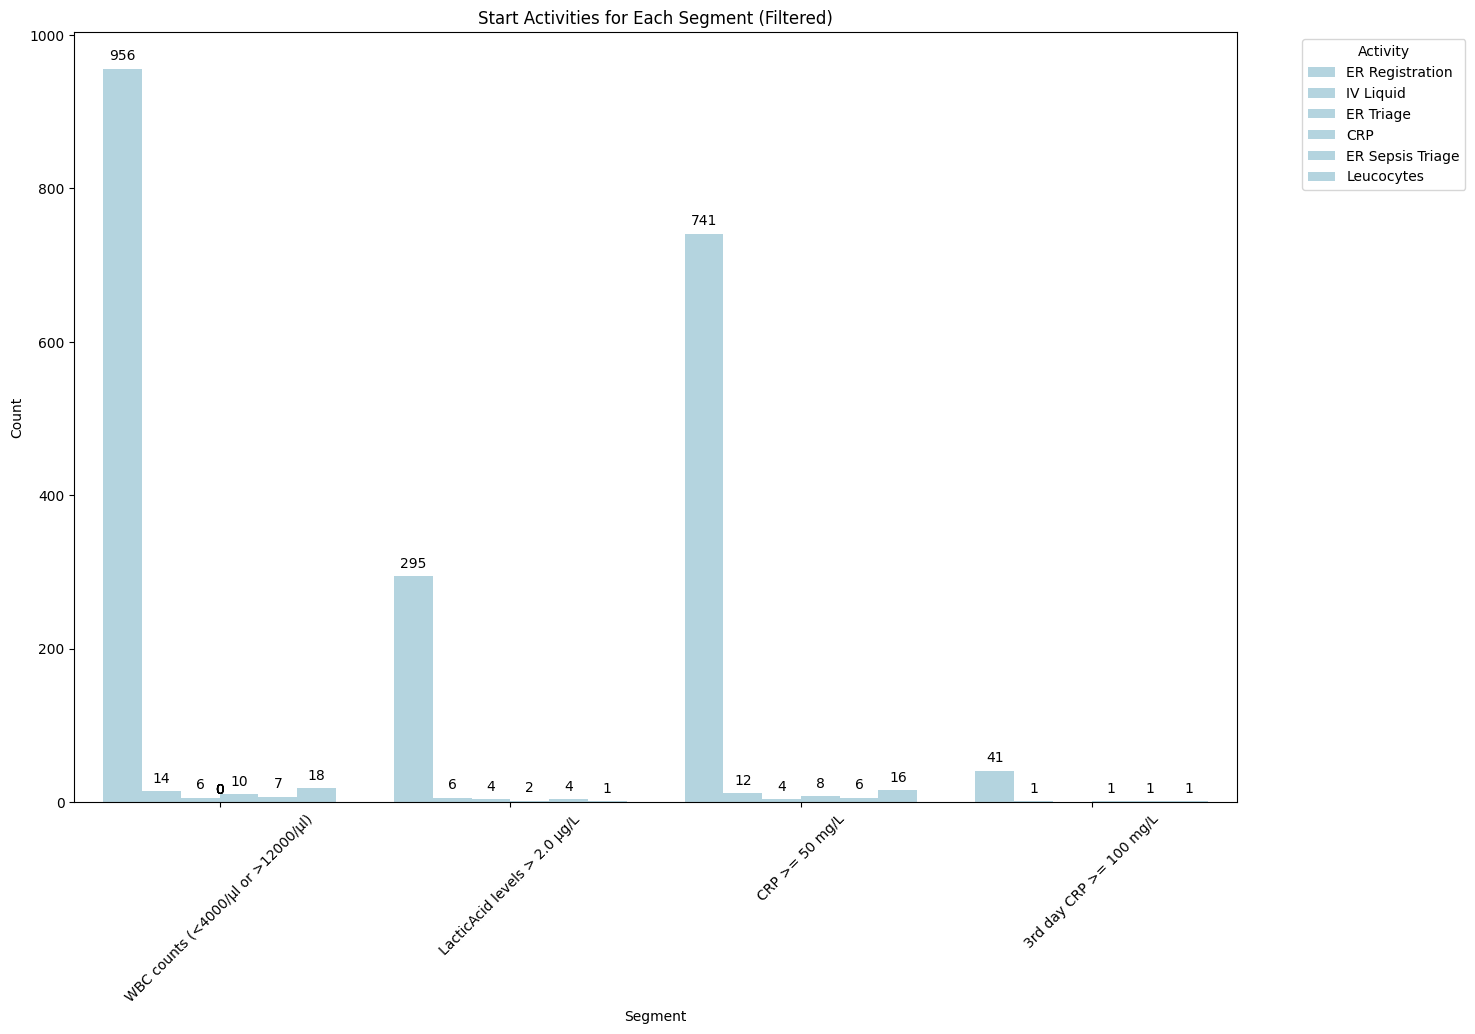

In [34]:
# Function to convert activities to DataFrame
def activities_to_dataframe(activities, segment_name, activity_type):
    df = pd.DataFrame(list(activities.items()), columns=['Activity', 'Count'])
    df['Type'] = activity_type
    df['Segment'] = segment_name
    return df

# Combine all start activities into a single DataFrame
start_activities_df = []

# Append WBC segment start activities
start_activities_df.append(activities_to_dataframe(start_wbc, 'WBC counts (<4000/μl or >12000/μl)', 'Start'))

# Append high Lactic Acid segment start activities
start_activities_df.append(activities_to_dataframe(start_lactic_acid_high, 'LacticAcid levels > 2.0 µg/L', 'Start'))

# Append CRP segment start activities
start_activities_df.append(activities_to_dataframe(start_crp, 'CRP >= 50 mg/L', 'Start'))

# Append 3rd day CRP segment start activities
start_activities_df.append(activities_to_dataframe(start_third_day_crp, '3rd day CRP >= 100 mg/L', 'Start'))

# Concatenate all DataFrames into a single DataFrame
start_activities_df = pd.concat(start_activities_df, ignore_index=True)

# Plotting function for activities
def plot_activities(activity_df):
    # Define custom color palette
    custom_palette = sns.color_palette(["#ADD8E6"] * len(activity_df['Activity'].unique()))
    
    # Plotting
    plt.figure(figsize=(15, 10))
    plot = sns.barplot(data=activity_df, x='Segment', y='Count', hue='Activity', palette=custom_palette, ci=None)
    plt.title('Start Activities for Each Segment (Filtered)')
    plt.xlabel('Segment')
    plt.ylabel('Count')
    plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    
    # Add labels to the bars
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points')
    
    plt.show()

# Plot all start activities on a single graph
plot_activities(start_activities_df)


/var/folders/_m/f0p_ms5n47x_n4d21g19nlh00000gn/T/ipykernel_65372/1788842234.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(data=activity_df, x='Segment', y='Count', hue='Activity', palette=lightpink_palette, ci=None)


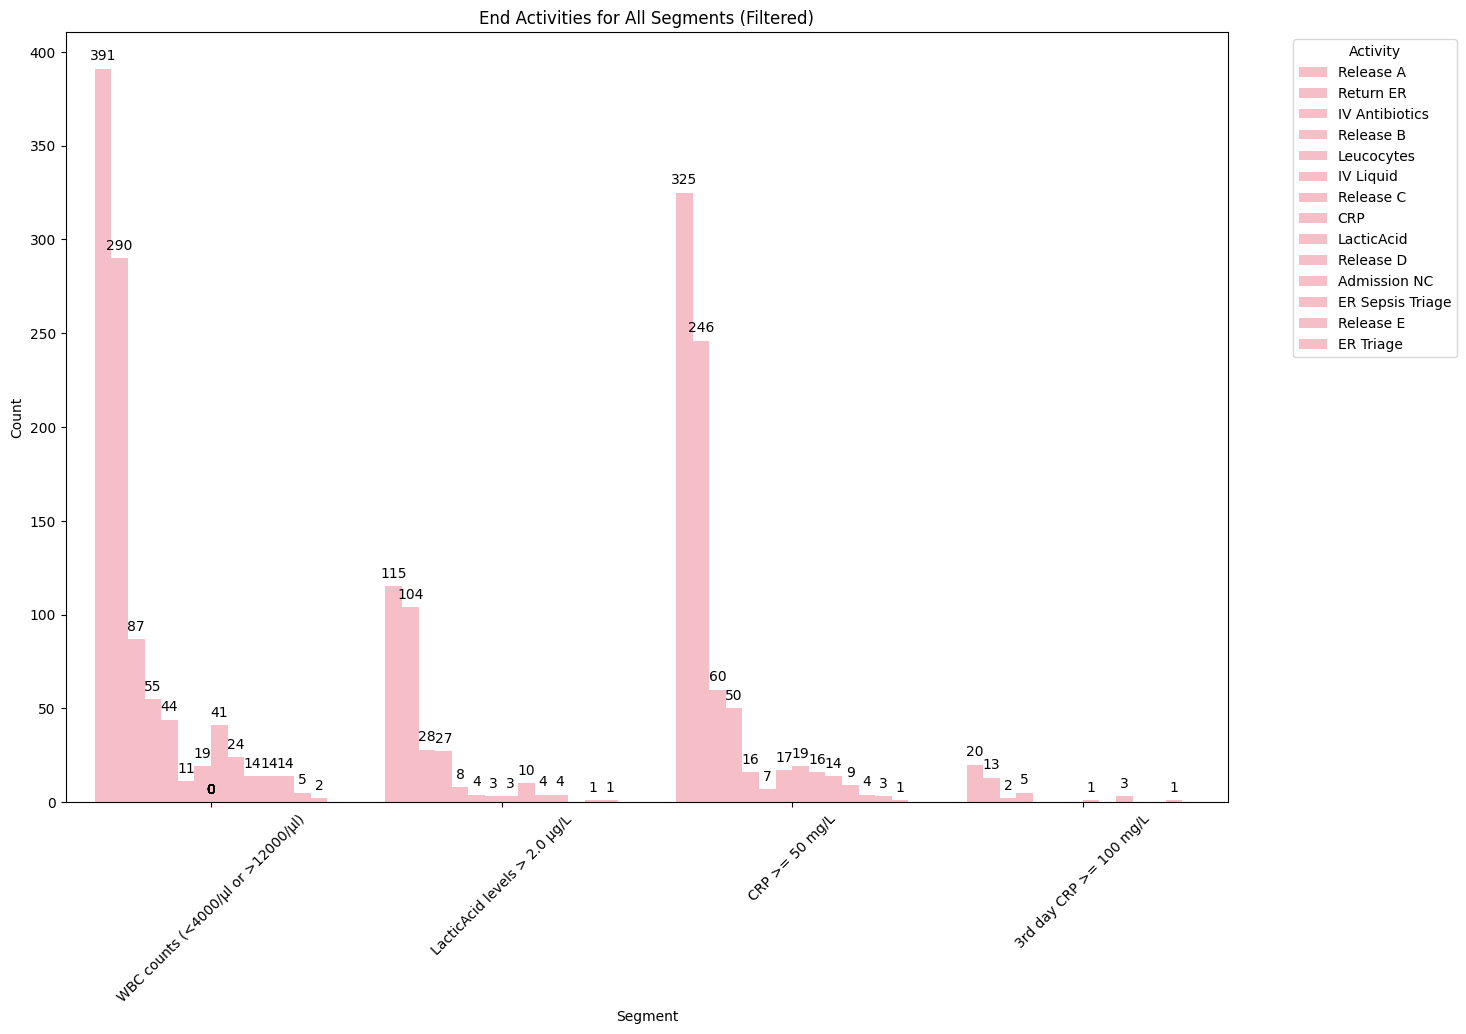

In [40]:
# Function to convert activities to DataFrame
def activities_to_dataframe(activities, segment_name, activity_type):
    df = pd.DataFrame(list(activities.items()), columns=['Activity', 'Count'])
    df['Type'] = activity_type
    df['Segment'] = segment_name
    return df

# Combine all end activities into a single DataFrame
end_activities_df = []

# Append WBC segment end activities
end_activities_df.append(activities_to_dataframe(end_wbc, 'WBC counts (<4000/μl or >12000/μl)', 'End'))

# Append high Lactic Acid segment end activities
end_activities_df.append(activities_to_dataframe(end_lactic_acid_high, 'LacticAcid levels > 2.0 µg/L', 'End'))

# Append CRP segment end activities
end_activities_df.append(activities_to_dataframe(end_crp, 'CRP >= 50 mg/L', 'End'))

# Append 3rd day CRP segment end activities
end_activities_df.append(activities_to_dataframe(end_third_day_crp, '3rd day CRP >= 100 mg/L', 'End'))

# Concatenate all DataFrames into a single DataFrame
end_activities_df = pd.concat(end_activities_df, ignore_index=True)

# Plotting function for activities
def plot_activities(activity_df, segment_name):
    # Define custom color palette
    lightpink_palette = sns.color_palette(["#FFB6C1"] * len(activity_df['Activity'].unique()))
    
    # Plotting
    plt.figure(figsize=(15, 10))
    plot = sns.barplot(data=activity_df, x='Segment', y='Count', hue='Activity', palette=lightpink_palette, ci=None)
    plt.title(f'End Activities for {segment_name} (Filtered)')
    plt.xlabel('Segment')
    plt.ylabel('Count')
    plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    
    # Add labels to the bars
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points')
    
    plt.show()

# Plot all end activities on a single graph
plot_activities(end_activities_df, 'All Segments')


/var/folders/_m/f0p_ms5n47x_n4d21g19nlh00000gn/T/ipykernel_65372/3238307356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=admissions_df, x='Segment', y='Admissions', palette='viridis')


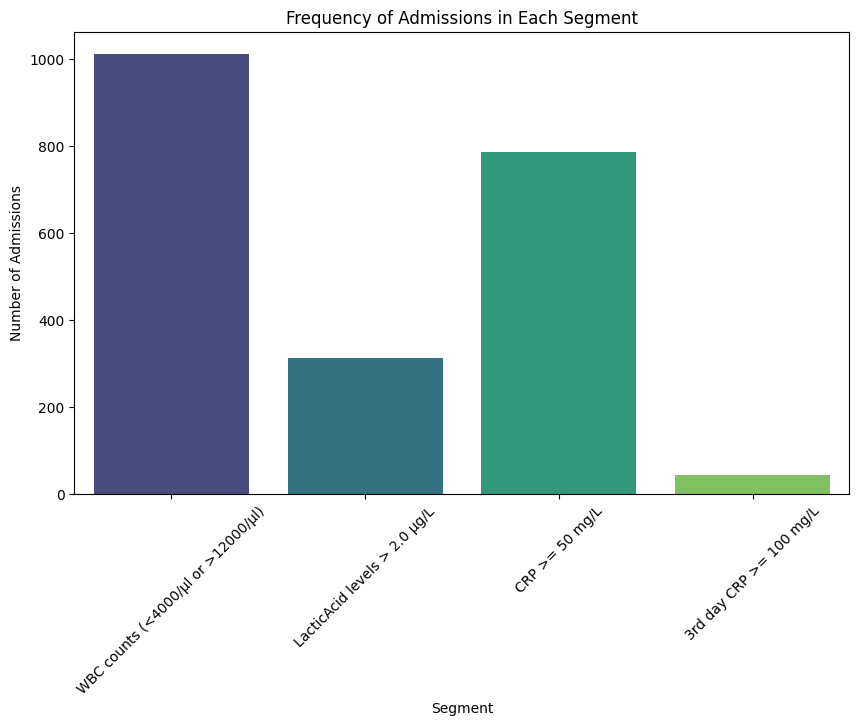

In [38]:
# Create a DataFrame for segment names and admission counts
segments = ['WBC counts (<4000/μl or >12000/μl)', 'LacticAcid levels > 2.0 µg/L', 'CRP >= 50 mg/L', '3rd day CRP >= 100 mg/L']
counts = [count_wbc, count_lactic_acid_high, count_crp, count_third_day_crp]
admissions_df = pd.DataFrame({'Segment': segments, 'Admissions': counts})

# Plotting
plt.figure(figsize=(10, 6))
plot = sns.barplot(data=admissions_df, x='Segment', y='Admissions', palette='viridis')
plt.title('Frequency of Admissions in Each Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.show()
